In [1]:
import sys
import os
import warnings
warnings.filterwarnings("ignore")

home_dir = "../"
src_path = os.path.join(home_dir, "src")

# Add the `src` folder to the Python path
sys.path.append(src_path)

from functions import (compute_distance_correlation_matrix,
 wgtda, compute_wto_matrix, compute_pearson_correlation_matrix,
  patient_correlation_measure)

from filters import remove_inf_values, extract_top_n_persistent_holes, filter_rows_by_list_length, filtering
from network import plot_gene_network, plot_gene_network_interactive, plot_gene_network_interactive2, set_plot_fonts

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
# Load data from cancer stages
expression_matrix = pd.read_csv("../data/treatment_response/fpkm_matrix.csv", index_col=0)
significant_genes = pd.read_csv("../data/treatment_response/significant_genes.csv", index_col=0)

# Separate phenotype labels
phenotype = expression_matrix["phenotype"]
expression_matrix = expression_matrix.drop(columns=["phenotype"])

# Select significant genes
significant_gene_names = significant_genes.index
sig_exp_matrix = expression_matrix[significant_gene_names.intersection(expression_matrix.columns)]

top_var_genes_data = sig_exp_matrix
gene_dict = {i: col_name for i, col_name in enumerate(top_var_genes_data.columns)}
top_var_genes_data["phenotype"] = phenotype.values

resistant_top_var_genes_data = top_var_genes_data[top_var_genes_data['phenotype'] == 'Resistance']
sensitive_top_var_genes_data = top_var_genes_data[top_var_genes_data['phenotype'] == 'Sensitive']


resistant_top_var_genes_data = resistant_top_var_genes_data.drop(columns=["phenotype"])
sensitive_top_var_genes_data = sensitive_top_var_genes_data.drop(columns=["phenotype"])

resistant_wto_matrix = compute_wto_matrix(resistant_top_var_genes_data.values, 'pearsons')
sensitive_wto_matrix = compute_wto_matrix(sensitive_top_var_genes_data.values, 'pearsons')

In [3]:
resistant_interactions = wgtda(resistant_wto_matrix, dimensions=3, gene_dict=gene_dict)
sensitive_interactions = wgtda(sensitive_wto_matrix, dimensions=3, gene_dict=gene_dict)

In [4]:
sensitive_interactions_filtered = filtering(sensitive_interactions, top_n=8, min_length=3)
resistant_interactions_filtered = filtering(resistant_interactions, top_n=8, min_length=3)


Plot saved successfully to ../plots/networks/resistant_network at 600 DPI.


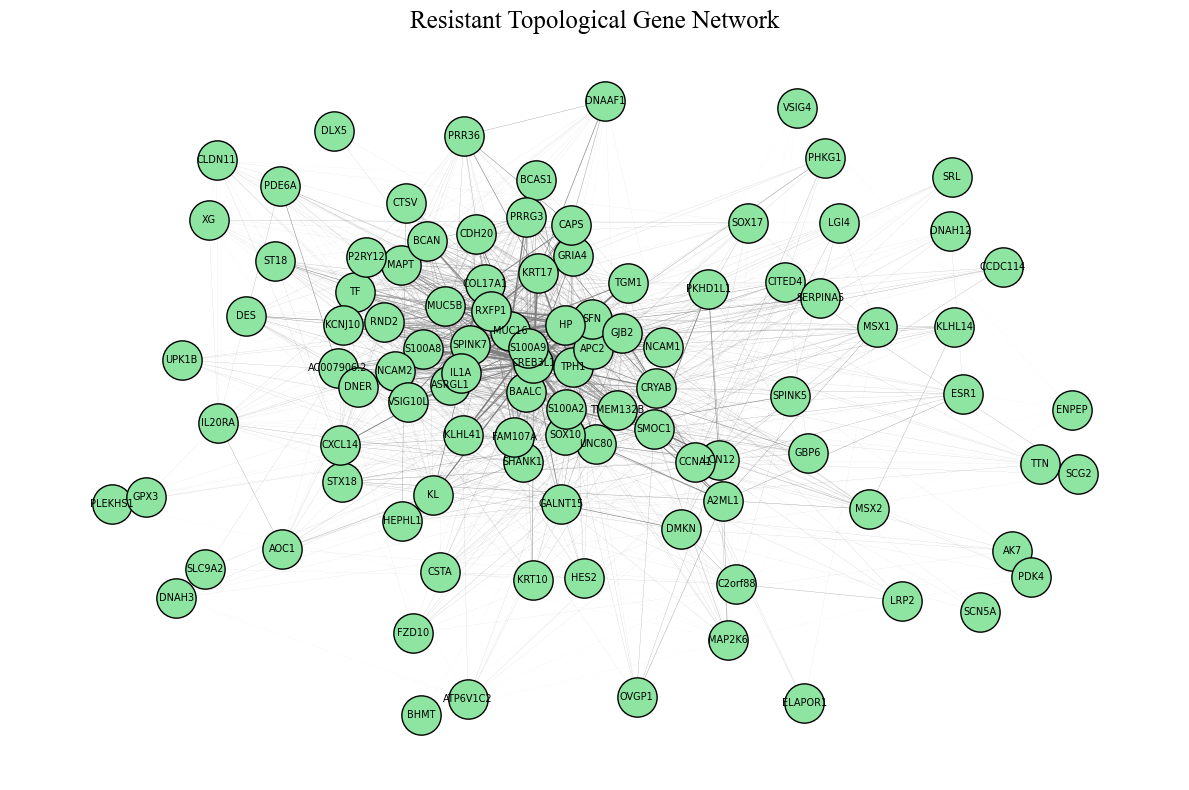

Plot saved successfully to ../plots/networks/sensitive_network at 600 DPI.


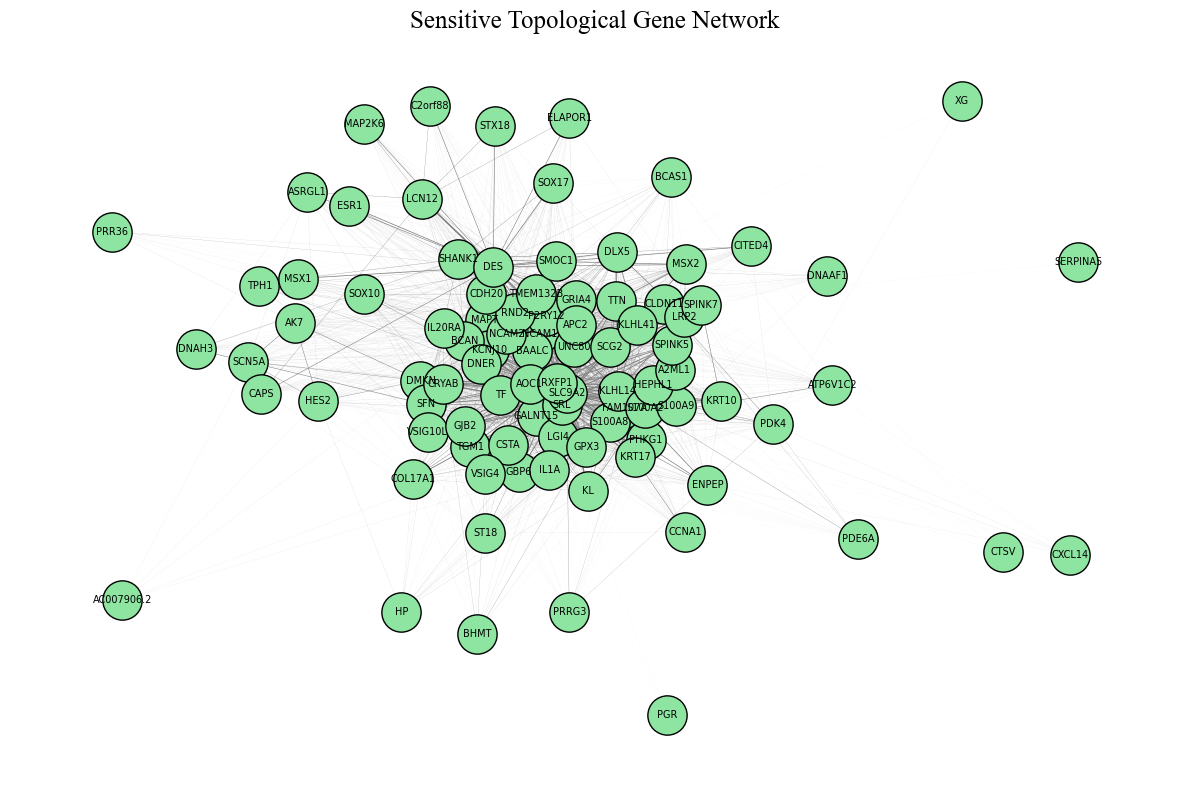

In [5]:
set_plot_fonts()
plot_gene_network(df=resistant_interactions_filtered, save_path="../plots/networks/resistant_network",title="Resistant Topological Gene Network", scale_factor=3, color_number=2)
plot_gene_network(df=sensitive_interactions_filtered, save_path="../plots/networks/sensitive_network",title="Sensitive Topological Gene Network", color_number=2)


In [7]:
sensitive_interactions_filtered = filtering(sensitive_interactions, top_n=0.5, min_length=3)
resistant_interactions_filtered = filtering(resistant_interactions, top_n=0.5, min_length=3)
plot_gene_network_interactive2(resistant_interactions_filtered, geneset_col='geneset', output_file='../resistant.html', title="Treatment Response of CPTAC - Resistant")
plot_gene_network_interactive2(sensitive_interactions_filtered, geneset_col='geneset', output_file='../sensitive.html', title="Treatment Response of CPTAC - Sensitive")

Interactive network saved to: ../resistant.html
../resistant.html
Interactive network saved to: ../sensitive.html
../sensitive.html
